# PanAnalysis Test Data

## Import required modules

Import the modules required for this solution

In [1]:
import pyodbc
import pandas as pd

## Connect to data source

In [2]:
s_server = '169.254.250.189\SQLEXPRESS'
s_database = 'PanAnalysis'
s_user = 'sa'
s_password = 'Demo'

s_connection = 'DRIVER={SQL Server Native Client 11.0};' 
s_connection += 'SERVER=' + s_server + ';DATABASE=' + s_database +';'
s_connection += 'UID=' + s_user +';PWD=' + s_password

dbconn = pyodbc.connect(s_connection)

print('Database connection made...')

Database connection made...


In [3]:
# Simple database query test
s_tmpsql = 'select top 10 * from zTempPanAnalysis'
dbcursor = dbconn.cursor()
dbcursor.execute(s_tmpsql)
dbrecordset = dbcursor.fetchall()
for record in dbrecordset:
    print('Incident ID :', record.Incident)

print('\nShould have printed 10 6-digit incident IDs.')

Incident ID : 155059
Incident ID : 155060
Incident ID : 155061
Incident ID : 155063
Incident ID : 155065
Incident ID : 155066
Incident ID : 155067
Incident ID : 155068
Incident ID : 155069
Incident ID : 155070

Should have printed 10 6-digit incident IDs.


## Load some data into a dataframe

In [4]:
data_array = []
for record in dbrecordset:
    data_array += [[record.Incident, record.IncidentType, record.CustomerId]]
print('Data array looks like:\n')
print(data_array)

Data array looks like:

[['155059', 'BREAKDOWN', '10023'], ['155060', 'RTF', '12421'], ['155061', 'BREAKDOWN', '12190'], ['155063', 'BREAKDOWN', '11946'], ['155065', 'BREAKDOWN', '12571'], ['155066', 'BREAKDOWN', '10879'], ['155067', 'BREAKDOWN', '11668'], ['155068', 'REPEAT', '13051'], ['155069', 'BREAKDOWN', '11042'], ['155070', 'RTF', '12046']]


In [5]:
df = pd.DataFrame(data_array, columns=['Incident','IncidentType','CustomerId'])
print('Data frame looks like:\n')
print(df)

Data frame looks like:

  Incident IncidentType CustomerId
0   155059    BREAKDOWN      10023
1   155060          RTF      12421
2   155061    BREAKDOWN      12190
3   155063    BREAKDOWN      11946
4   155065    BREAKDOWN      12571
5   155066    BREAKDOWN      10879
6   155067    BREAKDOWN      11668
7   155068       REPEAT      13051
8   155069    BREAKDOWN      11042
9   155070          RTF      12046


In [6]:
# Get the columns from the recordset
s_cols = [col[0] for col in dbcursor.description]
print('Columns list:\n', s_cols)

Columns list:
 ['ID', 'Incident', 'IncidentType', 'CustomerId', 'LedgerCode', 'BusinessType', 'SiteId', 'MachinesOnSite', 'SoleMachine', 'Manufacturer', 'SerialNo', 'ProductId', 'DeviceType', 'Colour', 'AncilliariesCount', 'FirstUsed', 'FirstUsedDays', 'Installed', 'InstalledDays', 'PreviousBreakdowns', 'LastBreakCall', 'LastBreakCallDays', 'LastOtherCall', 'LastOtherCallDays', 'LastOtherCallType', 'InitialMeterValueBlack', 'InitialMeterValueColour', 'InitialMeterReadingDate', 'LastMeterValueBlack', 'LastMeterValueColour', 'LastMeterReadingDate', 'BlackClickPerDay', 'ColourClickPerDay', 'TotalClickPerDay', 'CreatedBy', 'CreatedDateTime', 'CreatedTime', 'CreatedDay', 'AttendDateTime', 'AttendDay', 'AttendHour', 'CallMinutes', 'MinutesToAttend', 'PostCodeArea', 'FirstEngineer']


In [7]:
# This should fetch some rows and give the sensible column names
s_tmpsql2 = 'select top 10 * from zTempPanAnalysis'
df2 = pd.read_sql_query(s_tmpsql2, dbconn)

In [8]:
print(df2)


     ID Incident IncidentType CustomerId LedgerCode  \
0  1796   155059    BREAKDOWN      10023       M440   
1  1797   155060          RTF      12421       T278   
2  1798   155061    BREAKDOWN      12190      GP114   
3  1799   155063    BREAKDOWN      11946       C614   
4  1800   155065    BREAKDOWN      12571       H327   
5  1801   155066    BREAKDOWN      10879      MW016   
6  1802   155067    BREAKDOWN      11668       N219   
7  1803   155068       REPEAT      13051       E226   
8  1804   155069    BREAKDOWN      11042      SH067   
9  1805   155070          RTF      12046      MR002   

                           BusinessType SiteId  MachinesOnSite  SoleMachine  \
0                 Manufacturing - Other  21936               7        False   
1     Education - Secondary/High school  23678              16        False   
2                   Housing Association  24064              14        False   
3     Education - Secondary/High school  20076              14        False   

In [9]:
# Can now mess about with the dataframe
y = df['IncidentType']
print('Extracted:\n',y)

Extracted:
 0    BREAKDOWN
1          RTF
2    BREAKDOWN
3    BREAKDOWN
4    BREAKDOWN
5    BREAKDOWN
6    BREAKDOWN
7       REPEAT
8    BREAKDOWN
9          RTF
Name: IncidentType, dtype: object


In [10]:
data = df2
del data['IncidentType']
print('Feature data:\n',data)

Feature data:
      ID Incident CustomerId LedgerCode                          BusinessType  \
0  1796   155059      10023       M440                 Manufacturing - Other   
1  1797   155060      12421       T278     Education - Secondary/High school   
2  1798   155061      12190      GP114                   Housing Association   
3  1799   155063      11946       C614     Education - Secondary/High school   
4  1800   155065      12571       H327     Education - Secondary/High school   
5  1801   155066      10879      MW016     Education - Secondary/High school   
6  1802   155067      11668       N219     Education - Secondary/High school   
7  1803   155068      13051       E226  Manufacturing - Chemicals/Fuels/Oils   
8  1804   155069      11042      SH067     Professional - Architect/Surveyor   
9  1805   155070      12046      MR002     Education - Secondary/High school   

  SiteId  MachinesOnSite  SoleMachine Manufacturer     SerialNo      ...       \
0  21936               

In [11]:
y_repeat = y.map(lambda x: x == 'REPEAT')
print(y_repeat)
print(y)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: IncidentType, dtype: bool
0    BREAKDOWN
1          RTF
2    BREAKDOWN
3    BREAKDOWN
4    BREAKDOWN
5    BREAKDOWN
6    BREAKDOWN
7       REPEAT
8    BREAKDOWN
9          RTF
Name: IncidentType, dtype: object


In [12]:
df_times = df2[['AttendHour','CallMinutes','MinutesToAttend']].copy()
print (df_times)

   AttendHour  CallMinutes  MinutesToAttend
0          10           45               90
1           8           54              498
2          10           25              108
3          14           98              312
4          13          111              241
5           9          167              540
6          10          206               97
7          13           62              230
8          10           50               36
9          11          143              139


In [13]:
# Now build a decision tree classifier on this data
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df_times,y_repeat)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [16]:
# Note: had to install this new package
import pydotplus

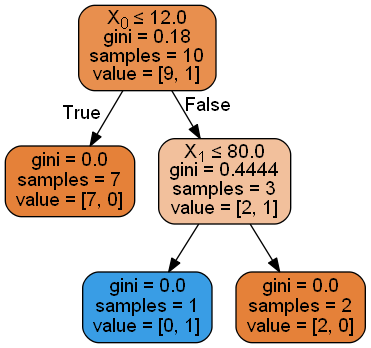

In [17]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

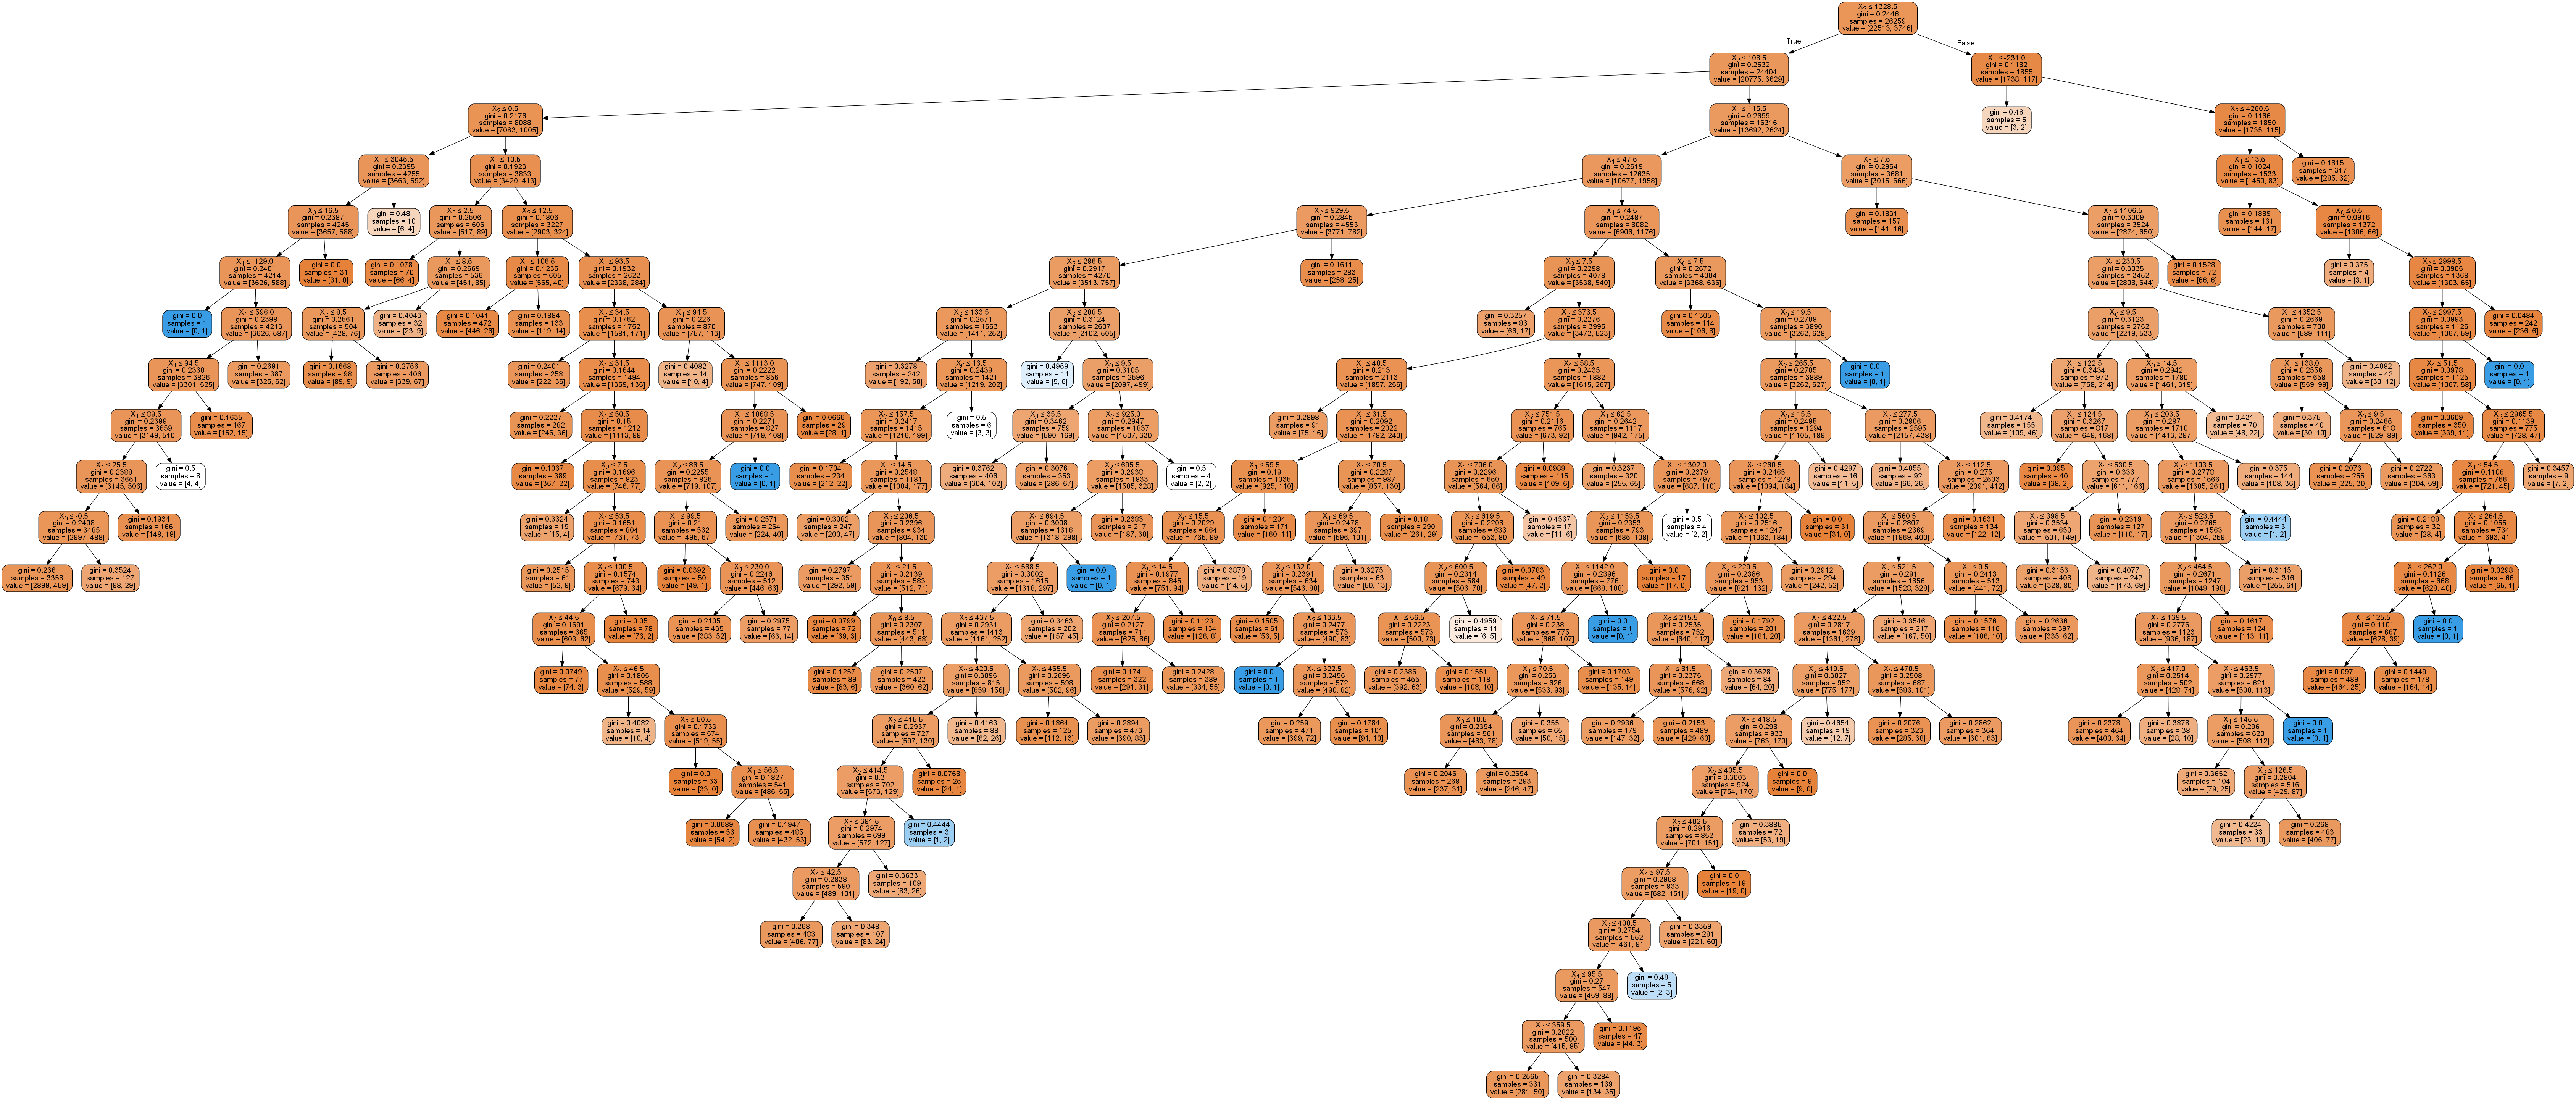

In [32]:
## Run on the whole dataset
# load in the data
s_tmpsql_all = 'select * from zTempPanAnalysis'
data_all = pd.read_sql_query(s_tmpsql_all, dbconn)
# get the repeats
y_all = data_all['IncidentType']
# get rid of the data not required
del data_all['IncidentType']
# encode the repeat data for predicion
y_repeat_all = y_all.map(lambda x: x == 'REPEAT')
# copy out the data we want
df_times_all = data_all[['AttendHour','CallMinutes','MinutesToAttend']].copy()
# replace any remaining NaN values with -1, to avoid breaking the algorithm
df_times_all = df_times_all.fillna(-1)
#print (df_times_all)
# fit a classifier
dtree_all=DecisionTreeClassifier(min_samples_split=500)
dtree_all.fit(df_times_all,y_repeat_all)
# visualise
dot_data = StringIO()
export_graphviz(dtree_all, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
#df_times_all[0:10]
print(dtree_all.decision_path(df_times_all[0:10]))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 426)	1
  (0, 780)	1
  (0, 964)	1
  (0, 965)	1
  (0, 1085)	1
  (0, 1215)	1
  (0, 1216)	1
  (0, 1217)	1
  (0, 1227)	1
  (0, 1228)	1
  (0, 1229)	1
  (0, 1230)	1
  (0, 1232)	1
  (0, 1236)	1
  (0, 1238)	1
  (0, 1240)	1
  (0, 1244)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2033)	1
  (1, 2034)	1
  (1, 4484)	1
  :	:
  (8, 1215)	1
  (8, 1216)	1
  (8, 1217)	1
  (8, 1227)	1
  (8, 1311)	1
  (9, 0)	1
  (9, 1)	1
  (9, 2033)	1
  (9, 8509)	1
  (9, 8567)	1
  (9, 8568)	1
  (9, 8569)	1
  (9, 9163)	1
  (9, 9164)	1
  (9, 9165)	1
  (9, 9166)	1
  (9, 9167)	1
  (9, 9168)	1
  (9, 9446)	1
  (9, 9447)	1
  (9, 9448)	1
  (9, 9449)	1
  (9, 9450)	1
  (9, 9454)	1
  (9, 9458)	1


## Need to do some management of the data - e.g. categoricals to IDs etc

1. Convert categorical data to IDs - e.g. engineer names, postcodes - consider if one-hot encoding is better here
2. Remove fields we don't need - e.g. redundant datatime values, incident IDs, serial numbers
